# Visualizing COVID-19 Data from JHU CSSE
---  
### Data acquired from [https://github.com/CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19)

In [1]:
# Import required packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib as mpl
import numpy as np
import pandas as pd
from pylab import cm

# Load data from JHU repository

In [2]:
# Filenames of JHU data
filename_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
filename_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
filename_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
# Open JHU data files
data_confirmed = pd.read_csv(filename_confirmed)
data_recovered = pd.read_csv(filename_recovered)
data_deaths = pd.read_csv(filename_deaths)

In [4]:
# Edit certain country names for aesthetics
for i in [data_confirmed, data_recovered, data_deaths]:
    i.loc[i['Country/Region'] == 'Korea, South', 'Country/Region'] = 'South Korea'
    i.loc[i['Country/Region'] == 'US', 'Country/Region'] = 'USA'
    i.loc[i['Country/Region'] == 'United Kingdom', 'Country/Region'] = 'UK'

# Function `covidData` to extract data for specific countries
```python
covidData(country, output=1, start=100)
```
`country` &ndash; string representing Country of interest  
`output` &ndash; Type of output desired (`1` for confirmed cases, `2` for recovered cases, `3` for deaths, and `4` for net cases &ndash; default `1`)  
`start` &ndash; Return data starting at the n<sup>th</sup> case, represented by value of `start` &ndash; default `100`  

In [5]:
def covidData(country, output=1, start=100):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # Find first non-zero index to get day 0 (first confirmed case)
    day0 = -1
    for i in range(len(data_conf)):
        if output == 1 or output == 4:
            if data_conf[i] >= start:
                day0 = i
                break
        elif output == 2:
            if data_rec[i] >= start:
                day0 = i
                break
        else:
            if data_dea[i] >= start:
                day0 = i
                break
    if day0 == -1:
        return []
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        return data_conf[day0:]
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        return data_rec[day0:]
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        return data_dea[day0:]
    
    # If output is 4 (net), return the net number of cases
    if output == 4:
        data_output = (data_conf.subtract(data_rec)).subtract(data_dea)
        return data_output[day0:]

# Confirmed Cases
---   
## Load confirmed case data for different countries  
`highlighted_countries` &ndash; <b>highlighted countries</b> that are shown as color traces with labels  

In [6]:
# Confirmed cases

# Load all country names into a list
countries = []
for i in data_confirmed['Country/Region']:
    if i not in countries:
        countries.append(i)

# List of country names to highlight in the plot
highlighted_countries = ['USA', 'UK', 'Italy', 'Japan', 'South Korea', 'India', 
                         'Singapore', 'Australia', 'Iran', 'Spain']

## Plot confirmed cases &ndash; starting at 100<sup>th</sup> case

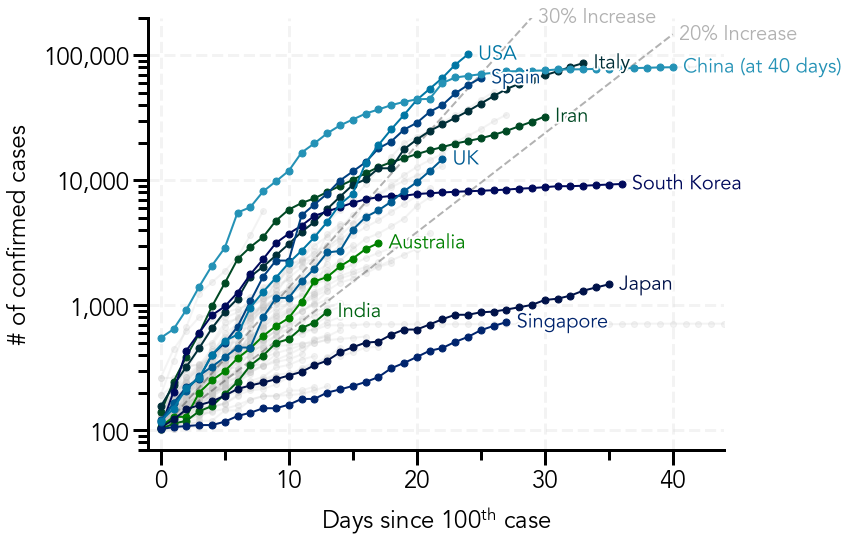

In [7]:
# Plot of confirmed cases

# Change font and axis parameters
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

# Generate list of colors from 'ocean' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('ocean', 1.5*len(highlighted_countries))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Edit the tick lengths and thicknesses
ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.3)

# Range of plot (x-axis and y-axis)
x_max = 41 # Days
y_max = 2*10**5 # Cases

# Padding for text labels
left_pad = -0.2

# Lines for exponential increase (edit rate as desired)
rate = [20, 30] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [100]
    total_cases = 100
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Increase', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 1, 100)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Plot China separately and truncate for comparison
china_data = covidData('China', 1, 100)
ax.plot(np.arange(0, x_max, 1), china_data[0:x_max], marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
text = ax.text(x_max + left_pad, china_data[x_max], 'China (at ' + str(x_max - 1) + ' days)', size=20, ha='left', va='center', color=colors(colorCounter))
text.set_path_effects([pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(10))
ax.set_yticklabels(['', '', '100', '1,000', '10,000', '100,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 100$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel('# of confirmed cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(70, y_max)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
# plt.savefig('covid-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()

# Plot deaths &ndash; starting at 10<sup>th</sup> death

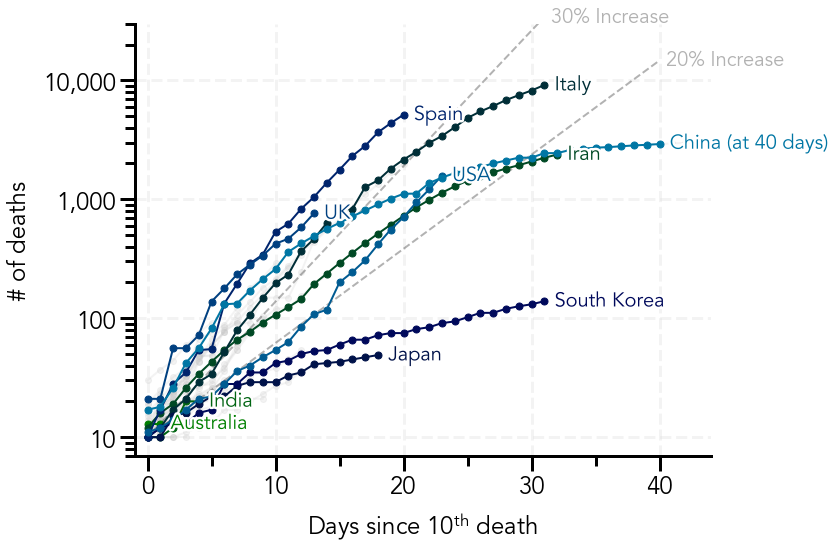

In [8]:
# Plot of deaths

# Change font and axis parameters
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

# Generate list of colors from 'ocean' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('ocean', 1.5*len(highlighted_countries))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Edit the tick lengths and thicknesses
ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.3)

# Range of plot (x-axis and y-axis)
x_max = 41 # Days
y_max = 3*10**4 # Cases

# Padding for text labels
left_pad = -0.2

# Lines for exponential increase (edit rate as desired)
rate = [20, 30] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [10]
    total_cases = 10
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Increase', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 3, 10)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Plot China separately and truncate for comparison
china_data = covidData('China', 3, 10)
ax.plot(np.arange(0, x_max, 1), china_data[0:x_max], marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
text = ax.text(x_max + left_pad, china_data[x_max], 'China (at ' + str(x_max - 1) + ' days)', size=20, ha='left', va='center', color=colors(colorCounter))
text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])        

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(10))
ax.set_yticklabels(['', '', '10', '100', '1,000', '10,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 10$\mathregular{^{th}}$ death', labelpad=10)
ax.set_ylabel('# of deaths', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(7, y_max)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
# plt.savefig('covid-deaths.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()

# Plot net cases &ndash; starting at 100<sup>th</sup> case

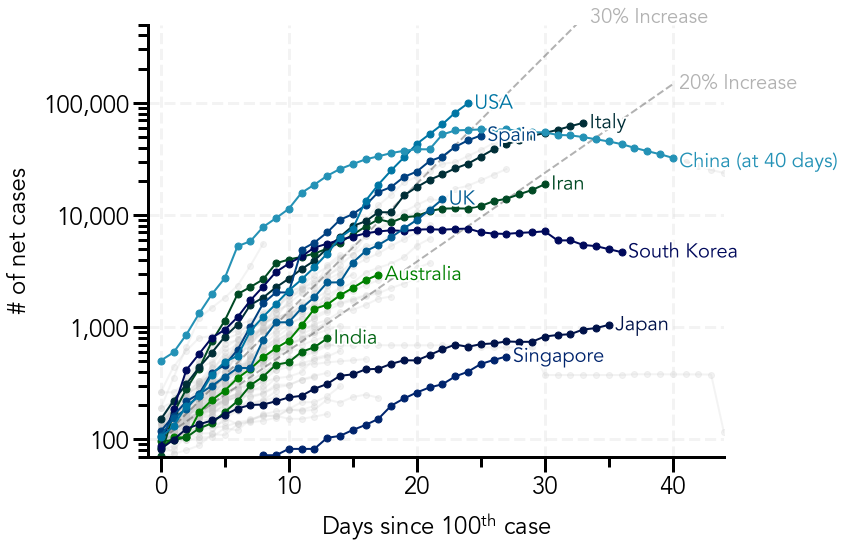

In [9]:
# Plot of net cases

# Change font and axis parameters
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

# Generate list of colors from 'ocean' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('ocean', 1.5*len(highlighted_countries))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(8,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Edit the tick lengths and thicknesses
ax.xaxis.set_tick_params(which='major', size=15, width=3)
ax.xaxis.set_tick_params(which='minor', size=10, width=3)
ax.yaxis.set_tick_params(which='major', size=15, width=3)
ax.yaxis.set_tick_params(which='minor', size=10, width=3)

# Add grid for readability of logarithmic axes
ax.grid(color='#d9d9d9', linewidth=3, linestyle='--', alpha=0.3)

# Range of plot (x-axis and y-axis)
x_max = 41 # Days
y_max = 5*10**5 # Cases

# Padding for text labels
left_pad = -0.5

# Lines for exponential increase (edit rate as desired)
rate = [20, 30] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [100]
    total_cases = 100
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Increase', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 4, 100)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, marker='o', linewidth=2, color=color_bg, alpha=0.2, zorder=1)
        
# Plot China separately and truncate for comparison
china_data = covidData('China', 4, 100)
ax.plot(np.arange(0, x_max, 1), china_data[0:x_max], marker='o', ms=7, linewidth=2, color=colors(colorCounter), zorder=2)
text = ax.text(x_max + left_pad, china_data[x_max], 'China (at ' + str(x_max - 1) + ' days)', size=20, ha='left', va='center', color=colors(colorCounter))
text.set_path_effects([pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

# Set y-axis tick intervals and labels
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(10))
ax.set_yticklabels(['', '', '100', '1,000', '10,000', '100,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 100$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel('# of net cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(70, y_max)

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
# plt.savefig('covid-net-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()

# Case doubling rate
---  
## Function `doubling_rate` to determine rate at which cases double
```python
doubling_rate(country, output=1)
```
`country` &ndash; string representing Country of interest  
`output` &ndash; Type of output desired (`1` for confirmed cases, `2` for recovered cases, and `3` for deaths &ndash; default `1`) 

In [10]:
def doubling_rate(country, output=1):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        current_cases = data_conf[-1]
        
        # Most recent doubling
        for i in range(2, len(data_conf) + 1):
            if 2*data_conf[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = (current_cases - data_conf[-2])/(data_conf[-2])
        
        # Return instantaneous rate and most recent doubling
        return np.log(2)/np.log(1 + change), doubling_event
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        current_cases = data_rec[-1]
        
        # Most recent doubling
        for i in range(2, len(data_rec) + 1):
            if 2*data_rec[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = (current_cases - data_rec[-2])/(data_rec[-2])
        
        # Return instantaneous rate and most recent doubling
        return np.log(2)/np.log(1 + change), doubling_event
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        current_cases = data_dea[-1]
        
        # Most recent doubling
        for i in range(2, len(data_dea) + 1):
            if 2*data_conf[-i] <= current_cases:
                doubling_event = i - 1
                break
        
        # Instantaneous doubling rate
        change = (current_cases - data_dea[-2])/(data_dea[-2])
        
        # Return instantaneous rate and most recent doubling
        return np.log(2)/np.log(1 + change), doubling_event

### List of countries to plot case doubling rate

In [11]:
countries = ['USA', 'UK', 'Italy', 'South Korea', 'Japan', 'Singapore', 'India']

### Plot horizontal bar chart of doubling rates of cases

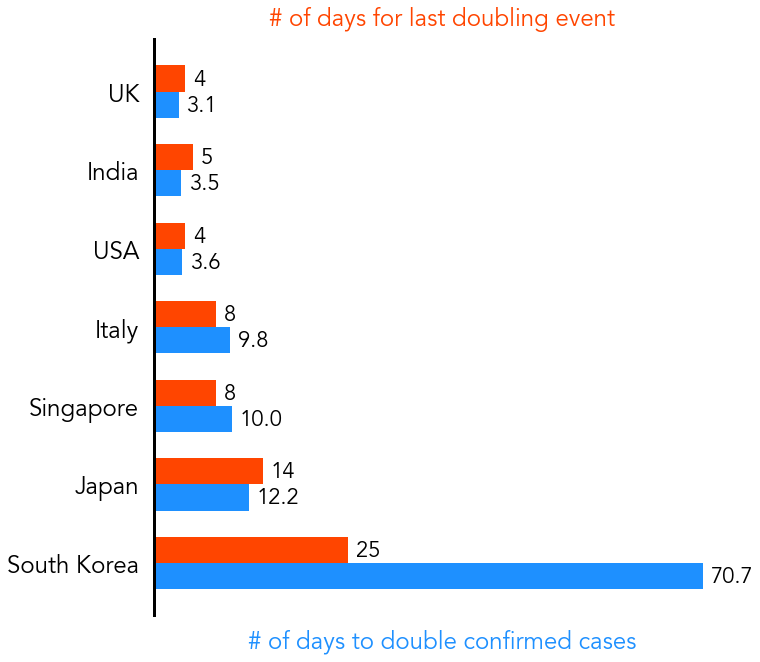

In [12]:
# Plot of doubling rate of cases

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])
ax2 = ax.twiny()

# Remove spines on primary and secondary axes
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(which='major', size=0)
ax.yaxis.set_tick_params(which='major', size=0, pad=15)
ax2.xaxis.set_tick_params(which='major', size=0)

# Get doubling rate data
double_rate = []
double_event = []
for i in countries:
    double_rate.append(doubling_rate(i, 1)[0])
    double_event.append(doubling_rate(i, 1)[1])
    
# Sort the doubling rates from shortest to longest
countries = [x for _, x in sorted(zip(double_rate, countries), reverse=True)]
double_event = [x for _, x in sorted(zip(double_rate, double_event), reverse=True)]
double_rate = sorted(double_rate, reverse=True)


double_rate_y = np.arange(0, 3*len(countries), 3)
double_event_y = np.arange(1, 3*len(countries) + 1, 3)

# Plot horizontal bars for doubling rates
ax.barh(double_rate_y, double_rate, height=1, align='edge', color='#1e90ff')
ax.barh(double_event_y, double_event, height=1, align='edge', color='#ff4500')

# Places labels for the doubling rates
padding = 1
for i in range(len(countries)):
    ax.text(double_rate[i] + padding, double_rate_y[i], str(round(double_rate[i], 1)), size=22, ha='left', va='bottom')
    ax.text(double_event[i] + padding, double_event_y[i], str(round(double_event[i], 1)), size=22, ha='left', va='bottom')
    
# Remove x-tick labels
ax.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

# Set country names for y-tick labels
ax.set_yticks(double_event_y)
ax.yaxis.set_ticklabels(countries)

# Set x-axis label
ax.set_xlabel('# of days to double confirmed cases', labelpad=10, color='#1e90ff')
ax2.set_xlabel('# of days for last doubling event', labelpad=10, color='#ff4500')

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
# plt.savefig('Doubling_Rate.png', dpi=dpi, bbox_inches='tight')

plt.show()

### List of countries to plot case doubling rate

In [13]:
countries = ['USA', 'UK', 'Italy', 'South Korea', 'Japan']

### Plot horizontal bar chart of doubling rates of deaths

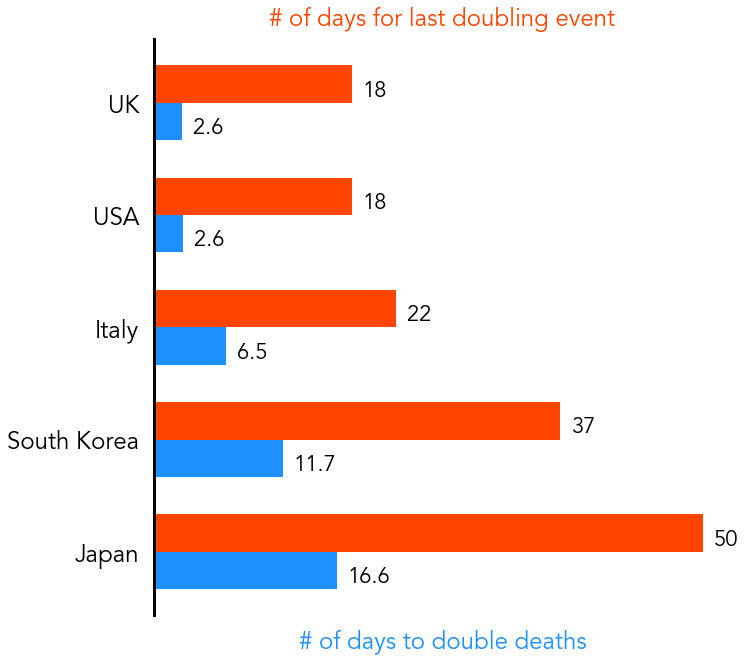

In [14]:
# Plot of doubling rate of deaths

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 24

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])
ax2 = ax.twiny()

# Remove spines on primary and secondary axes
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(which='major', size=0)
ax.yaxis.set_tick_params(which='major', size=0, pad=15)
ax2.xaxis.set_tick_params(which='major', size=0)

# Get doubling rate data
double_rate = []
double_event = []
for i in countries:
    double_rate.append(doubling_rate(i, 3)[0])
    double_event.append(doubling_rate(i, 3)[1])
    
# Sort the doubling rates from shortest to longest
countries = [x for _, x in sorted(zip(double_rate, countries), reverse=True)]
double_event = [x for _, x in sorted(zip(double_rate, double_event), reverse=True)]
double_rate = sorted(double_rate, reverse=True)


double_rate_y = np.arange(0, 3*len(countries), 3)
double_event_y = np.arange(1, 3*len(countries) + 1, 3)

# Plot horizontal bars for doubling rates
ax.barh(double_rate_y, double_rate, height=1, align='edge', color='#1e90ff')
ax.barh(double_event_y, double_event, height=1, align='edge', color='#ff4500')

# Places labels for the doubling rates
padding = 1
for i in range(len(countries)):
    ax.text(double_rate[i] + padding, double_rate_y[i], str(round(double_rate[i], 1)), size=22, ha='left', va='bottom')
    ax.text(double_event[i] + padding, double_event_y[i], str(round(double_event[i], 1)), size=22, ha='left', va='bottom')
    
# Remove x-tick labels
ax.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

# Set country names for y-tick labels
ax.set_yticks(double_event_y)
ax.yaxis.set_ticklabels(countries)

# Set x-axis label
ax.set_xlabel('# of days to double deaths', labelpad=10, color='#1e90ff')
ax2.set_xlabel('# of days for last doubling event', labelpad=10, color='#ff4500')

# Save plot (comment/uncomment as desired)
dpi = 300 # Resolution of image
# plt.savefig('Doubling_Rate.png', dpi=dpi, bbox_inches='tight')

plt.show()